In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.utils import to_categorical

In [ ]:
import os
import matplotlib.pyplot as plt

In [ ]:
!pip install speechpy
!pip install python_speech_features
import python_speech_features
import speechpy

In [ ]:
!pip install librosa

In [ ]:
import librosa
def lib_mfcc(wavefile):
    audio_data,r = librosa.load(wavefile)
    mfccs = librosa.feature.mfcc(y = audio_data,sr=r,n_mfcc = 30)
    return mfccs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


audio data: [-0.00139037 -0.00333516 -0.00409145 ...  0.00282894  0.0026822
 -0.00025396]


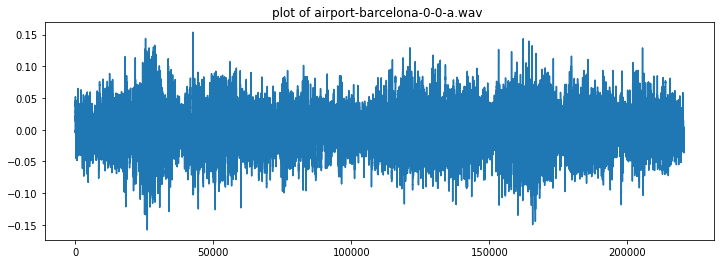

In [ ]:
filepath1 = "/content/drive/MyDrive/data/airport/airport-barcelona-0-0-a.wav"
audio_data,r = librosa.load(filepath1)
print("audio data:",audio_data)
plt.figure(figsize = (12,4))
plt.title("plot of airport-barcelona-0-0-a.wav ")
plt.plot(audio_data)

In [ ]:
Datadir = "/content/drive/MyDrive/data"
categories = ["airport","bus","metro","park","public_square","shopping_mall","street_traffic"]
data = []
for i in range(len(categories)):
    path = os.path.join(Datadir,categories[i])
    for f in os.listdir(path):
        filepath = os.path.join(path,f)
        mfccs = lib_mfcc(filepath)
        mfccs_avg = np.average(mfccs,axis = 1)
        data.append([mfccs_avg,i])



In [ ]:
import random
import numpy as np
random.shuffle(data)

In [ ]:
X = []
y = []
for feat,cls in data:
    X.append(feat)
    y.append(cls)
X = np.array(X)
y = np.array(y)

In [ ]:
encoded_y = to_categorical(y)

In [ ]:
encoded_y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
print(X)

[[-202.06848    132.12363      0.9828276 ...    1.1810333   -1.744093
     1.1810584]
 [-181.86334    144.47563    -46.168766  ...    1.4577674   -9.556955
    -3.1087286]
 [-310.16385    216.04337    -44.720108  ...   -3.6423736   -6.5630493
    -5.9255695]
 ...
 [-379.44174    166.1708      23.458681  ...    5.30919      1.7225603
     1.5715363]
 [-275.53555    145.22475    -16.551369  ...    3.1248472   -2.2335958
     4.0525465]
 [-297.3187     142.58012    -11.38663   ...    1.7795923    2.956062
    -1.7425622]]


In [ ]:
print(X.shape,encoded_y.shape)

(714, 30) (714, 7)


In [ ]:
Datadir = "/content/drive/MyDrive/test_data"
categories = ["airport","bus","metro","park","public_square","shopping_mall","street_traffic"]
test_data = []
for i in range(len(categories)):
    path = os.path.join(Datadir,categories[i])
    for f in os.listdir(path):
        filepath = os.path.join(path,f)
        mfccs = lib_mfcc(filepath)
        mfccs_avg = np.average(mfccs,axis = 1)
        test_data.append([mfccs_avg,i])



AttributeError: ignored

In [ ]:
random.shuffle(test_data)
test_X = []
test_y = []
for feat,cls in data:
    test_X.append(feat)
    test_y.append(cls)
test_X = np.array(test_X)
test_y = np.array(test_y)
encoded_test_y = to_categorical(test_y)

In [ ]:
model=Sequential()
###first layer
model.add(Dense(20,input_shape=(30,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
# model.add(Dense(10))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

###final layer
model.add(Dense(7))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 20)                620       
                                                                 
 activation_48 (Activation)  (None, 20)                0         
                                                                 
 dropout_36 (Dropout)        (None, 20)                0         
                                                                 
 dense_51 (Dense)            (None, 7)                 147       
                                                                 
 activation_49 (Activation)  (None, 7)                 0         
                                                                 
Total params: 767
Trainable params: 767
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
model.fit(X,encoded_y,batch_size = 32,epochs = 200,validation_split = 0.2)

Epoch 1/200
18/18 [==============================] - 1s 13ms/step - loss: 52.5686 - accuracy: 0.1541 - val_loss: 24.9800 - val_accuracy: 0.2028
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 42.7313 - accuracy: 0.1401 - val_loss: 19.0262 - val_accuracy: 0.2308
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 35.7986 - accuracy: 0.1436 - val_loss: 14.7449 - val_accuracy: 0.2378
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 27.9667 - accuracy: 0.1401 - val_loss: 11.8995 - val_accuracy: 0.2517
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 22.7470 - accuracy: 0.1751 - val_loss: 9.1728 - val_accuracy: 0.2378
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 15.1430 - accuracy: 0.2102 - val_loss: 7.4377 - val_accuracy: 0.2657
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 12.2433 - accuracy: 0.1839 - val_loss: 6.1215 - val_accuracy: 0.2797
E

In [ ]:
test_acc = model.evaluate(test_X,encoded_test_y,verbose = 0)
print(test_acc[1])

0.7198879718780518


In [ ]:
Datadir = "/content/drive/MyDrive/data"
categories = ["airport","bus","metro","park","public_square","shopping_mall","street_traffic"]
data = []
for i in range(len(categories)):
    path = os.path.join(Datadir,categories[i])
    for f in os.listdir(path):
        filepath = os.path.join(path,f)
        mfccs = lib_mfcc(filepath)
        print(mfccs.shape)
        # mfccs_avg = np.average(mfccs,axis = 1)
        data.append([mfccs_avg,i])
        

random.shuffle(data)
X = []
y = []
for feat,cls in data:
    X.append(feat)
    y.append(cls)
X = np.array(X)
y = np.array(y)
encoded_y = to_categorical(y)

(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)
(30, 431)


In [ ]:
model=Sequential()
model.add(Flatten())
###first layer
model.add(Dense(10,input_shape=(431*30,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(7))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
model.fit(X,encoded_y,batch_size = 32,epochs = 100,validation_split = 0.2)

Epoch 1/100
18/18 [==============================] - 1s 21ms/step - loss: 72.0396 - accuracy: 0.1226 - val_loss: 18.3576 - val_accuracy: 0.1329
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 57.0269 - accuracy: 0.1541 - val_loss: 12.2018 - val_accuracy: 0.1329
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 39.9982 - accuracy: 0.1366 - val_loss: 9.0099 - val_accuracy: 0.1888
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 33.8254 - accuracy: 0.1278 - val_loss: 7.3647 - val_accuracy: 0.1049
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 21.9947 - accuracy: 0.1699 - val_loss: 6.4071 - val_accuracy: 0.1049
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 17.6947 - accuracy: 0.1471 - val_loss: 5.4273 - val_accuracy: 0.1049
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 11.7913 - accuracy: 0.1524 - val_loss: 4.1517 - val_accuracy: 0.1049
Epo